In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

## Feature Engineering

In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

+ So there are no null values present is dataset

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

Now we have separated month and date column date column is of no use, so we will drop it.

In [10]:
df.drop('Date',axis=1,inplace=True)

In [11]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [13]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

These two are our target variables and these are unique values present in those columns.

In [14]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Description of dataset:
    
    1.There are no null values present in dataset.
    2.No negative/invalid values are present.
    3.By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of 
    the column.
    4.The mean is greater than the median in most of the columns which means they are skewed to right.
    5. In some of the columns median is greater than the mean, hence they are skewed to left. 

In [16]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['type', 'region']


In [17]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


## Exploratory Data Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


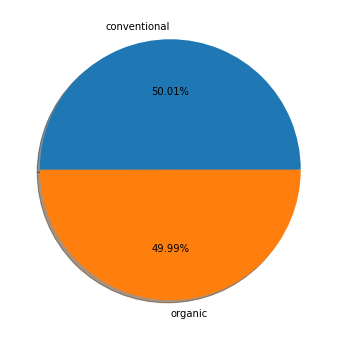

In [18]:
#visualizing type of avacado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


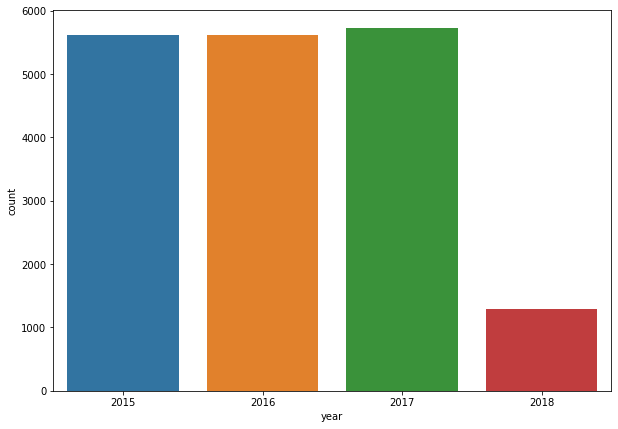

In [19]:
#visualize the count of year
print(df['year'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot('year',data=df)
plt.show()

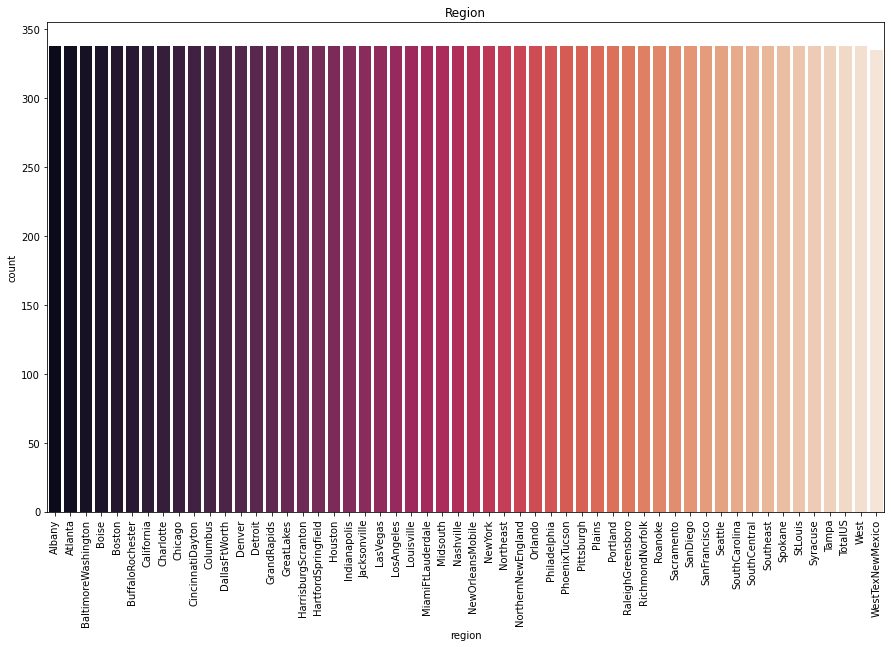

In [20]:
# visualize region of sale
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

Count of sale is same in each region.But in WestTexNewMexico region it is less than other.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


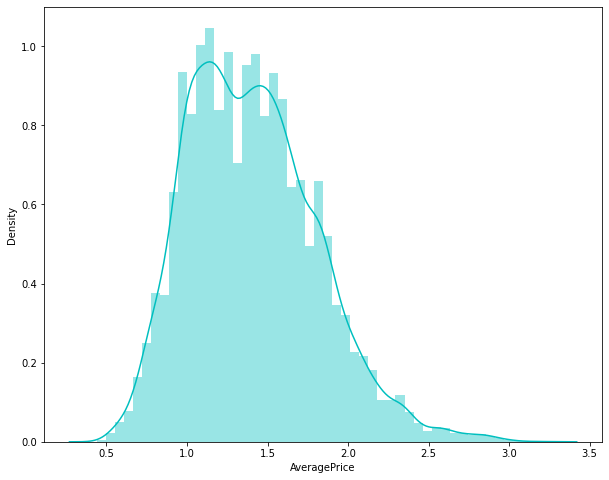

In [21]:
print(df['AveragePrice'].value_counts())
plt.figure(figsize=(10,8))
sns.distplot(df['AveragePrice'],color='c')
plt.show()

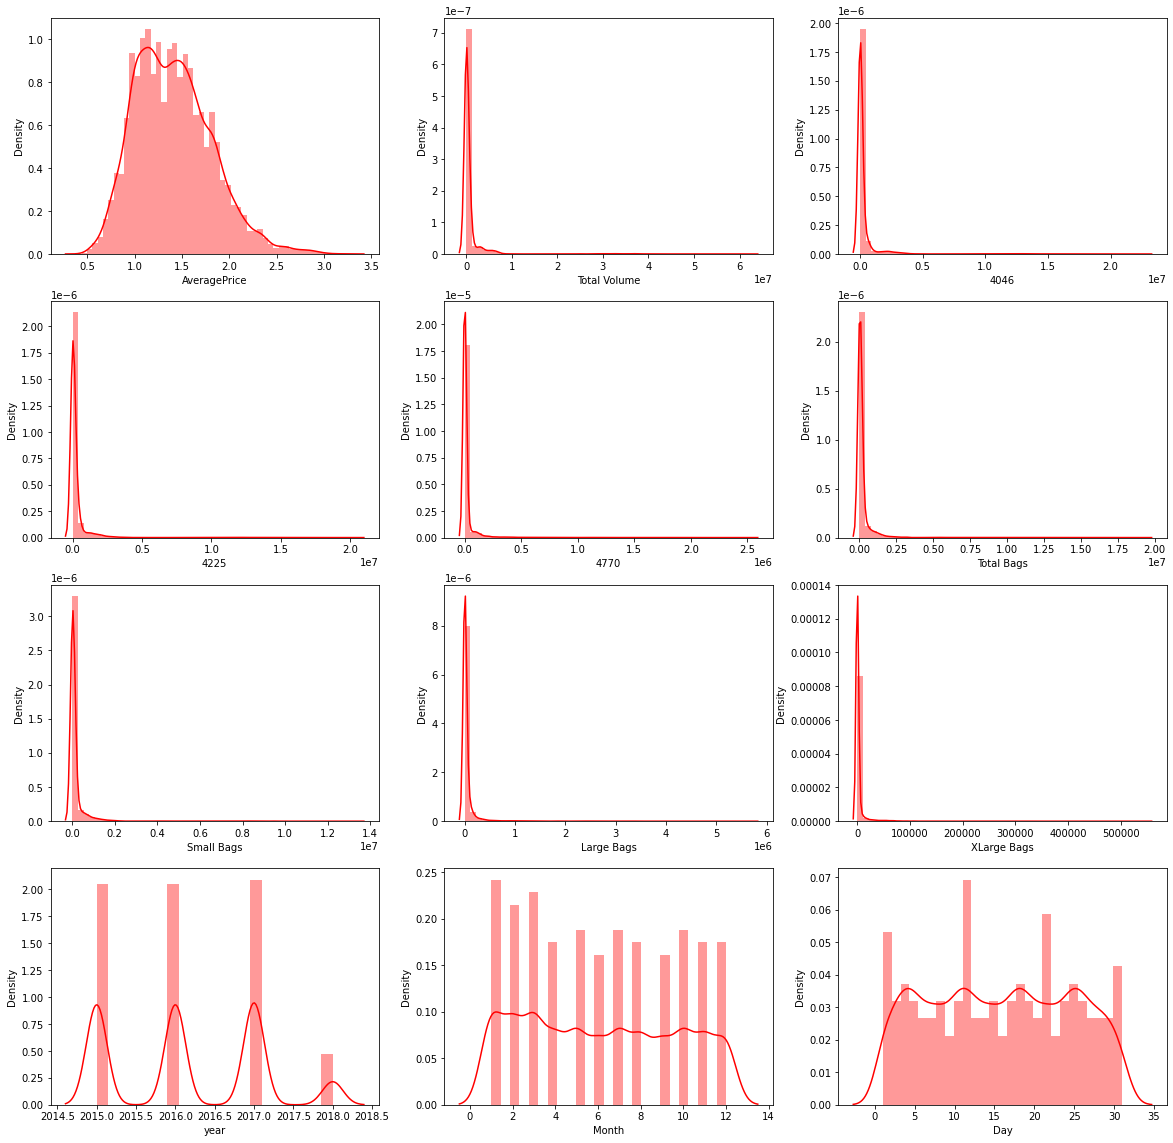

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in numerical_col:
    if plotnum<=14:
        ax=plt.subplot(4,3,plotnum)
        sns.distplot(df[col],color='r')
    plotnum+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later.

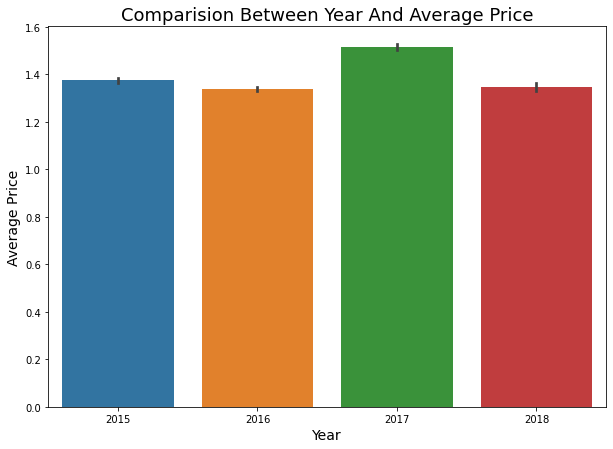

In [23]:
#checking which year has maximum average price
plt.figure(figsize=(10,7))
sns.barplot('year','AveragePrice',data=df)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Comparision Between Year And Average Price',fontsize=18)
plt.show()

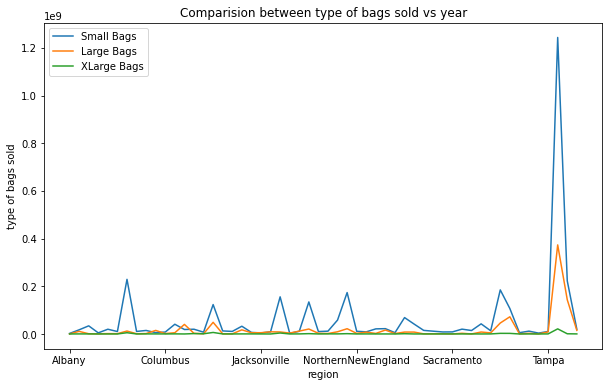

In [24]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

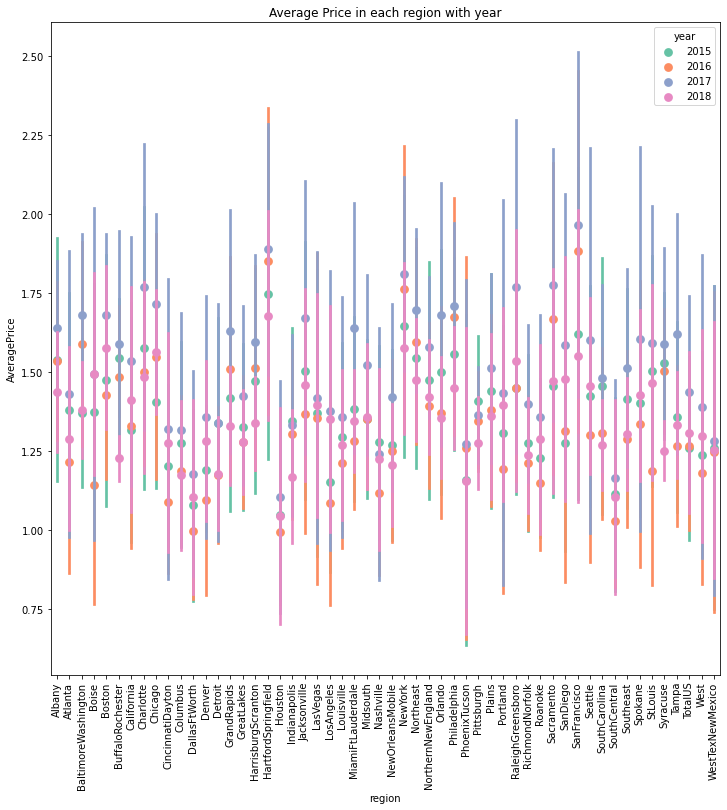

In [25]:
plt.figure(figsize=(12,12))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

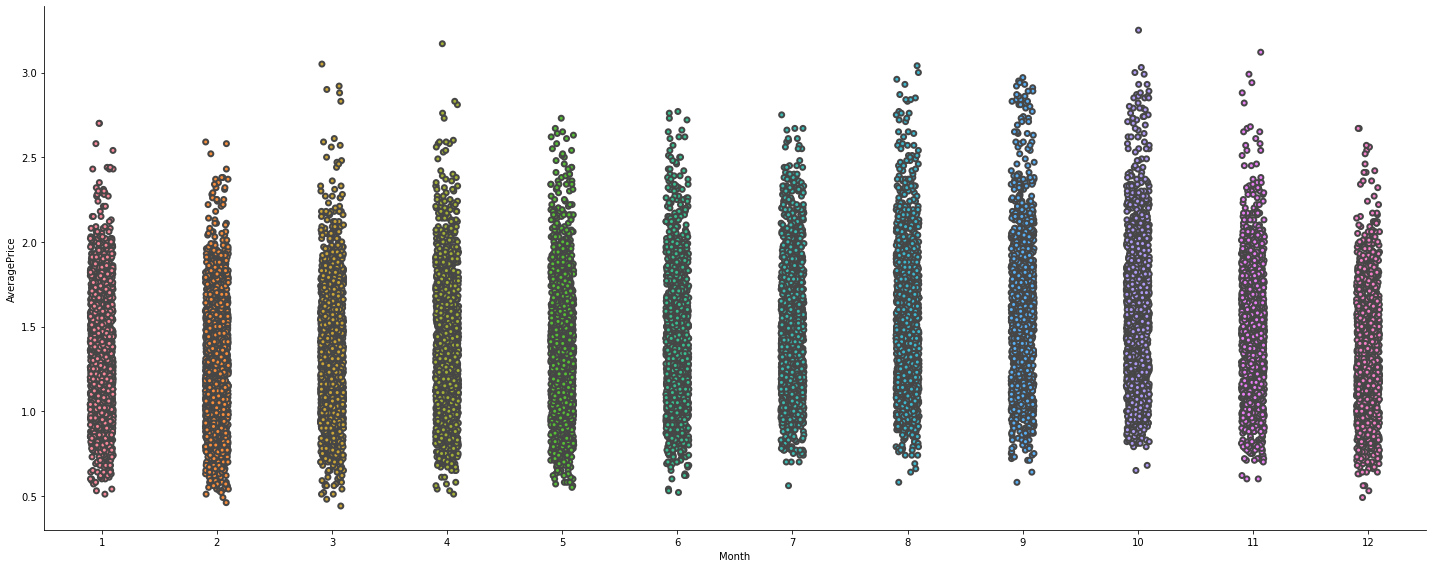

In [26]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

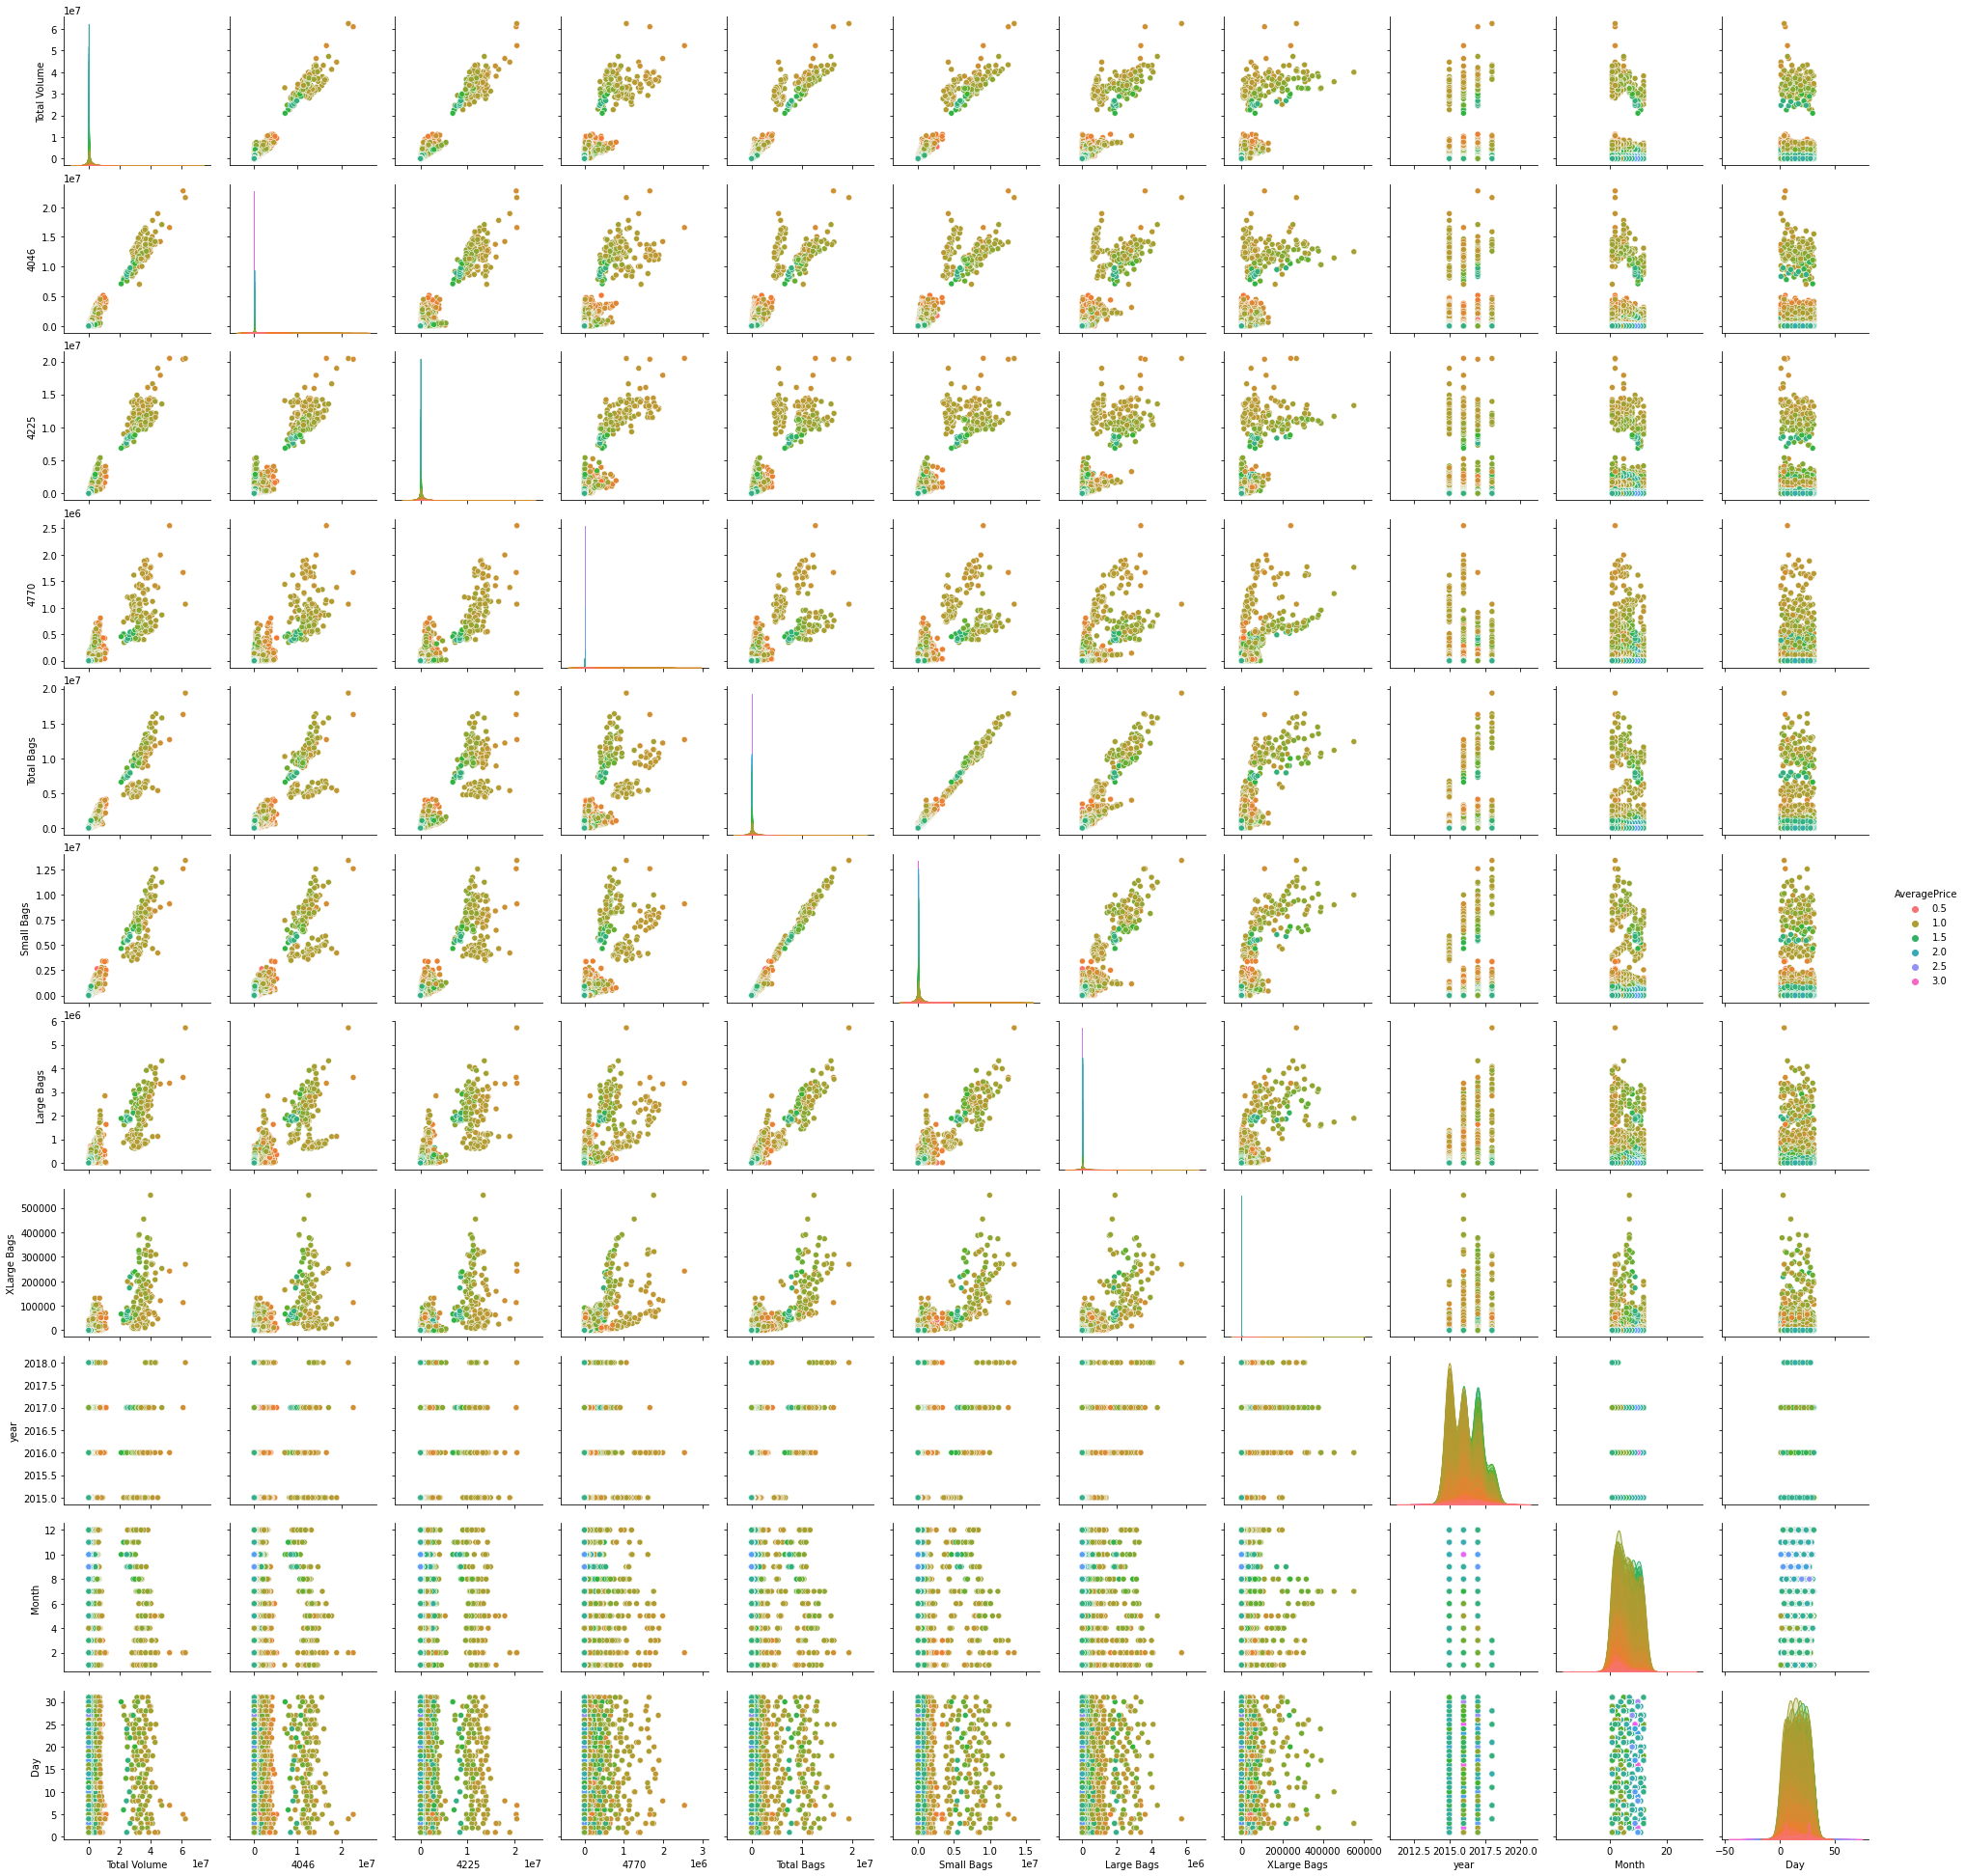

In [27]:
sns.pairplot(df,hue='AveragePrice',palette='husl')

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

<b>Checking the outliers

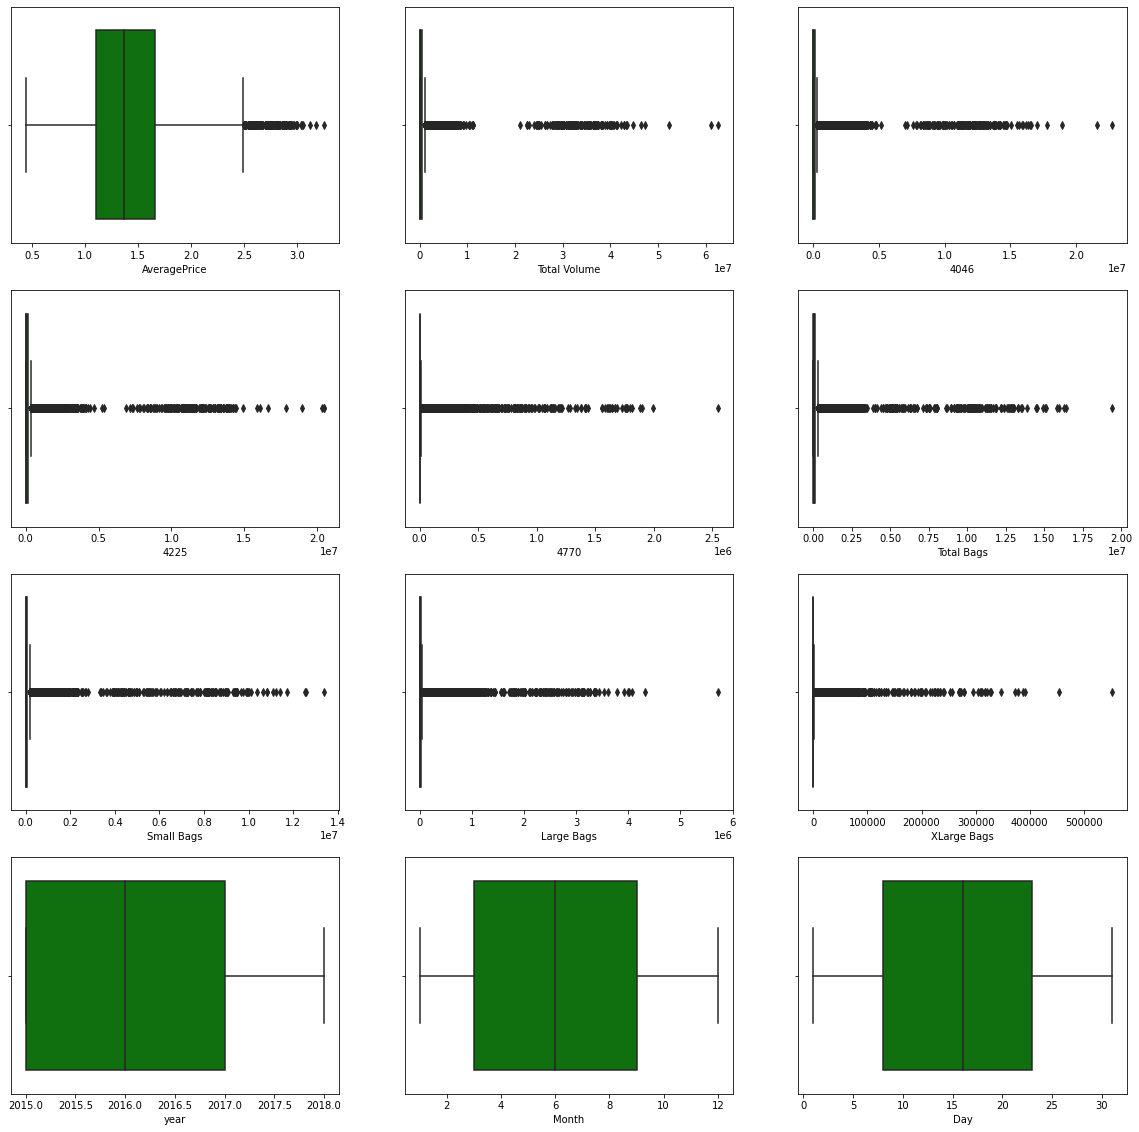

In [28]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in numerical_col:
    if plotnum<=14:
        ax=plt.subplot(4,3,plotnum)
        sns.boxplot(df[col],color='g')
    plotnum+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

### Removing Outliers

We will use z score method to remove outliers.

In [29]:
from scipy.stats import zscore

features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

z=np.abs(zscore(features))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [30]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


<b>Checking for skewness

In [31]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

<b>Removing skewness using yeo-johnson method

In [32]:
#removing skewness using yeo-johnson method for better prediction
from sklearn.preprocessing import PowerTransformer

features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box-cox' or 'yeo-johnson' 
'''

"\nparameters:\nmethod='box-cox' or 'yeo-johnson' \n"

In [33]:
df_new[features]=scaler.fit_transform(df_new[features].values)
df_new[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [34]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [35]:
#removinng skewness using log transformation
df_new['XLarge Bags']=np.log1p(df_new['XLarge Bags'])

In [36]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Now skewness is removed.

### Encoding catogorical columns using Label Encoder

In [37]:
cat_col

['type', 'region']

In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_new[cat_col]=df_new[cat_col].apply(le.fit_transform)

df_new[cat_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


### Correlation 

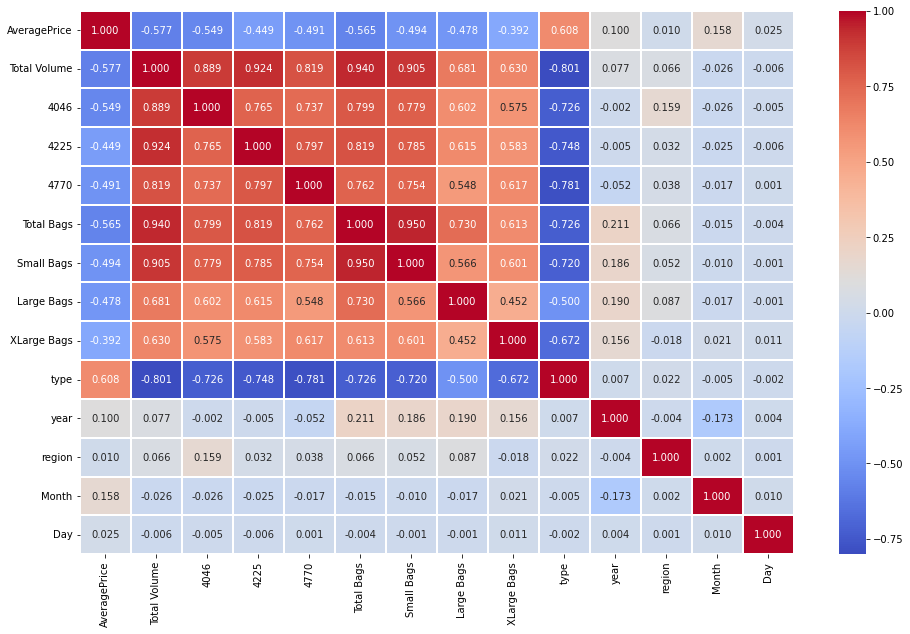

In [39]:
corr=df_new.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,linewidths=.2,cmap='coolwarm',fmt='0.3f')
plt.yticks(rotation=0)
plt.show()

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target. The features Day and region have no relation with the target so we can drop these columns. Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value. Also most of the columns have no relation with each other and have zero correlation.

In [40]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

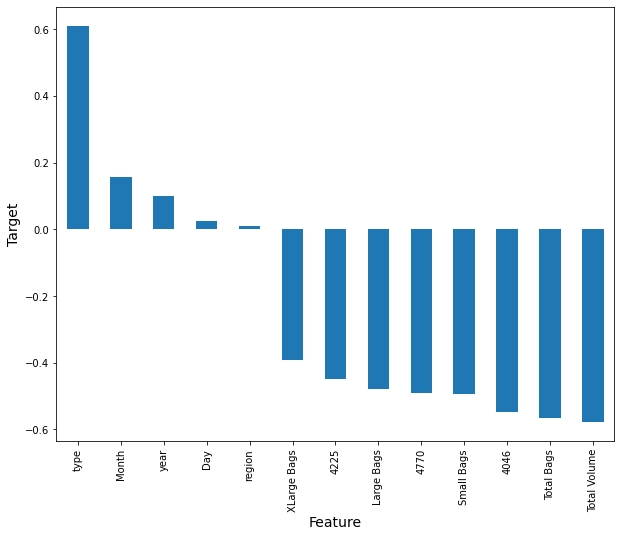

In [41]:
plt.figure(figsize=(10,8))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.show()

In [42]:
df_new.drop('Day',axis=1,inplace=True)

## Regression Model For Prediction by AveragePrice

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics


<b> Dividing the dataset into features and label

In [44]:
x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

print(x.shape)
print(y.shape)

(17782, 12)
(17782,)


<b>Scaling the data

In [45]:
scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,1.742552,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,1.742552,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,1.742552,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,1.742552,-1.468572


<b>Checking VIF values to solve Multicollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,52.131276,Total Volume
1,7.153485,4046
2,11.169168,4225
3,3.952857,4770
4,34.509723,Total Bags
5,16.635346,Small Bags
6,3.462946,Large Bags
7,2.071298,XLarge Bags
8,3.757728,type
9,1.386245,year


The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [47]:
#dropping total volume column
x.drop('Total Volume',axis=1,inplace=True)

In [48]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.742061,4046
1,4.283636,4225
2,3.938377,4770
3,24.480097,Total Bags
4,16.635006,Small Bags
5,3.420844,Large Bags
6,2.058386,XLarge Bags
7,3.540936,type
8,1.383804,year
9,1.078624,region


The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [49]:
x.drop('Total Bags',axis=1,inplace=True)

In [50]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.723365,4046
1,4.138882,4225
2,3.938119,4770
3,4.101853,Small Bags
4,1.866013,Large Bags
5,2.058144,XLarge Bags
6,3.537713,type
7,1.359335,year
8,1.078618,region
9,1.051469,Month


The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building

## Modelling

<h4>Finding best random state

In [51]:
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best random state is ',maxRS,'with R2 score',maxAccu)

Best random state is  23 with R2 score 0.8764501726792507


In [52]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13336, 10)
(4446, 10)
(13336,)
(4446,)


### Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)

#prediction
pred_lr=lr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_lr))
print('MAE:',mean_absolute_error(y_test,pred_lr))
print('MSE:',mean_squared_error(y_test,pred_lr))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_lr)))

#checking cv score for linear regression
print('Cross-validation score :',cross_val_score(lr,x,y,cv=5).mean())

R2 Score: 0.5240264437531468
MAE: 0.220859774559583
MSE: 0.0804590100853574
RMSE: 0.2836529747514688
Cross-validation score : 0.08855676789690126


### Random Forest Regressor

In [54]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

#prediction
pred_rf=rf.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_rf))
print('MAE:',mean_absolute_error(y_test,pred_rf))
print('MSE:',mean_squared_error(y_test,pred_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_rf)))

#checking cv score for linear regression
print('Cross-validation score :',cross_val_score(rf,x,y,cv=5).mean())

R2 Score: 0.8873698548349784
MAE: 0.09443627980206926
MSE: 0.019039103888888888
RMSE: 0.13798225932665723
Cross-validation score : 0.2299418464217969


### KNeighbors Regressor

In [55]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

#prediction
pred_knn=knn.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_knn))
print('MAE:',mean_absolute_error(y_test,pred_knn))
print('MSE:',mean_squared_error(y_test,pred_knn))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_knn)))

#checking cv score for linear regression
print('Cross-validation score :',cross_val_score(knn,x,y,cv=5).mean())

R2 Score: 0.8764501726792507
MAE: 0.10130454340980656
MSE: 0.020884977058029688
RMSE: 0.14451635567654508
Cross-validation score : -0.01811860375811707


### Support Vector Machine Regressor

In [56]:
svr=SVR()
svr.fit(x_train,y_train)

#prediction
pred_svr=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_svr))
print('MAE:',mean_absolute_error(y_test,pred_svr))
print('MSE:',mean_squared_error(y_test,pred_svr))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_svr)))

#checking cv score for linear regression
print('Cross-validation score :',cross_val_score(svr,x,y,cv=5).mean())

R2 Score: 0.8030133900671153
MAE: 0.13360283505946005
MSE: 0.03329879869849414
RMSE: 0.18247958433341013
Cross-validation score : 0.007958673353282797


### SGD Regressor

In [57]:
sg=SGDRegressor()
sg.fit(x_train,y_train)

#prediction
pred_sg=sg.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_sg))
print('MAE:',mean_absolute_error(y_test,pred_sg))
print('MSE:',mean_squared_error(y_test,pred_sg))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_sg)))

#checking cv score for linear regression
print('Cross-validation score :',cross_val_score(sg,x,y,cv=5).mean())

R2 Score: 0.5234213902691347
MAE: 0.22129918991040196
MSE: 0.08056128888579367
RMSE: 0.2838332061013892
Cross-validation score : 0.105588577911967


By checking the difference between model accuracy and cross validation score i found KNN as best model.

## Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

parameter={'n_neighbors':[1,2,3,4,5],
           'weights':['uniform','distance'],
           'algorithm':['auto','ball_tree','kd_tree','brute'],
           'n_jobs':[10,20,30,40]}
GCV=GridSearchCV(KNeighborsRegressor(),parameter,scoring='r2',cv=5)

In [59]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [60]:
final_model=KNeighborsRegressor(algorithm='auto',n_jobs=10,n_neighbors=3,weights='distance')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.44484156945872
mean_squared_error: 0.017842537415566392
mean_absolute_error: 0.08955681540171309
RMSE value: 0.13357596121894985


## Saving the model

In [61]:
import joblib
joblib.dump(final_model,'Avacado-Regression.pkl')

['Avacado-Regression.pkl']

In [62]:
model=joblib.load('Avacado-Regression.pkl')

prediction=model.predict(x_test)
prediction

array([1.2671042 , 1.55642459, 1.66595219, ..., 1.45499831, 1.99442153,
       1.65427383])

In [63]:
pd.DataFrame([prediction[:],y_test[:]],index=['Predicted','Original'])

,0,1,2,3,4,5,6,7,8,9,...,4436,4437,4438,4439,4440,4441,4442,4443,4444,4445
Predicted,1.267104,1.556425,1.665952,0.933568,0.752701,0.871542,0.918362,1.787111,1.47921,1.49749,...,1.264566,1.216297,1.225975,1.06083,1.839722,1.646941,1.385467,1.454998,1.994422,1.654274
Original,1.210000,1.550000,1.370000,0.980000,0.820000,0.860000,0.950000,1.970000,1.37000,1.46000,...,1.210000,1.280000,1.220000,1.01000,1.880000,1.530000,1.390000,1.300000,1.930000,1.720000


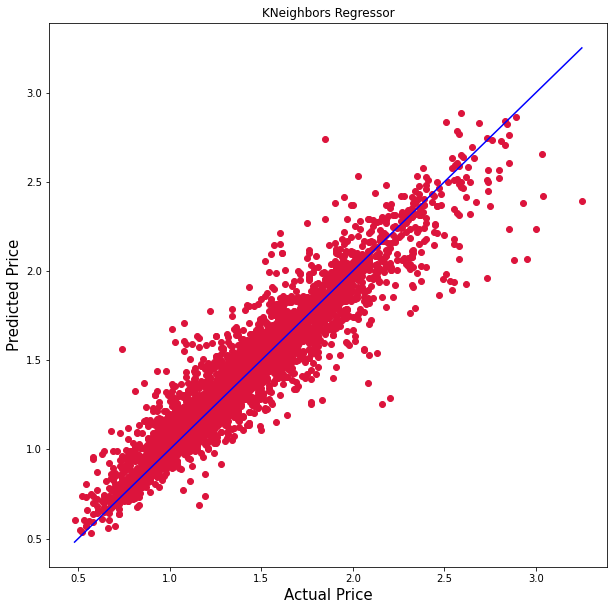

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

# Classification Model Prediction by Region

In [65]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [67]:
#dividing dependent and independent variables
X=df_new.drop('region',axis=1)
Y=df_new['region']

print(X.shape)
print(Y.shape)

(17782, 12)
(17782,)


In [68]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(X)
X = pd.DataFrame(X,columns=X.columns)

<b>Creating train test split

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=23)

### Logistic Regression

In [70]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)

print('Training Score:',LR.score(X_train,Y_train)*100)
print('Testing Score:',accuracy_score(Y_test,predLR)*100)

print(classification_report(Y_test,predLR))

print(confusion_matrix(Y_test,predLR))


Training Score: 20.920815836832634
Testing Score: 19.163292847503374
              precision    recall  f1-score   support

           0       0.17      0.28      0.21        79
           1       0.18      0.25      0.21        84
           2       0.13      0.20      0.16        75
           3       0.13      0.16      0.14        77
           4       0.12      0.13      0.13        82
           5       0.04      0.06      0.05        80
           6       0.20      0.23      0.21        74
           7       0.32      0.39      0.35        92
           8       0.61      0.46      0.52        90
           9       0.27      0.48      0.35        79
          10       0.09      0.08      0.08        92
          11       0.19      0.18      0.19        92
          12       0.17      0.24      0.20        89
          13       0.00      0.00      0.00        97
          14       0.14      0.45      0.22        67
          15       0.39      0.36      0.38        58
          16

### Decision Tree Classifier

In [71]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
preddt=dt.predict(X_test)

print('Training Score:',dt.score(X_train,Y_train)*100)
print('Testing Score:',accuracy_score(Y_test,preddt)*100)

print(classification_report(Y_test,preddt))

print(confusion_matrix(Y_test,preddt))

Training Score: 100.0
Testing Score: 79.1722896986055
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        79
           1       0.66      0.77      0.71        84
           2       0.81      0.91      0.86        75
           3       0.84      0.82      0.83        77
           4       0.80      0.88      0.84        82
           5       0.74      0.75      0.75        80
           6       0.88      0.92      0.90        74
           7       0.91      0.79      0.85        92
           8       0.91      0.93      0.92        90
           9       0.75      0.85      0.80        79
          10       0.70      0.72      0.71        92
          11       0.93      0.82      0.87        92
          12       0.87      0.83      0.85        89
          13       0.77      0.71      0.74        97
          14       0.73      0.81      0.77        67
          15       0.84      0.90      0.87        58
          16       0.88    

### Random Forest Classifier

In [72]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)

print('Training Score:',rfc.score(X_train,Y_train)*100)
print('Testing Score:',accuracy_score(Y_test,pred_rfc)*100)

print(classification_report(Y_test,pred_rfc))

print(confusion_matrix(Y_test,pred_rfc))

Training Score: 100.0
Testing Score: 91.07062528115159
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        79
           1       0.82      0.92      0.87        84
           2       0.95      1.00      0.97        75
           3       0.92      0.92      0.92        77
           4       0.90      0.99      0.94        82
           5       0.94      0.85      0.89        80
           6       0.94      1.00      0.97        74
           7       0.92      0.91      0.92        92
           8       0.97      0.96      0.96        90
           9       0.84      0.80      0.82        79
          10       0.83      0.88      0.85        92
          11       0.93      0.92      0.93        92
          12       0.94      0.94      0.94        89
          13       0.86      0.81      0.84        97
          14       0.84      0.91      0.87        67
          15       0.98      0.97      0.97        58
          16       0.97   

### KNeighbors Classifier

In [73]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)
pred_KNN=KNN.predict(X_test)

print('Training Score:',KNN.score(X_train,Y_train)*100)
print('Testing Score:',accuracy_score(Y_test,pred_KNN)*100)

print(classification_report(Y_test,pred_KNN))

print(confusion_matrix(Y_test,pred_KNN))

Training Score: 81.40371925614876
Testing Score: 57.01754385964912
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        79
           1       0.55      0.76      0.64        84
           2       0.50      0.77      0.61        75
           3       0.63      0.74      0.68        77
           4       0.56      0.74      0.64        82
           5       0.53      0.69      0.60        80
           6       0.55      0.74      0.63        74
           7       0.49      0.62      0.55        92
           8       0.78      0.66      0.71        90
           9       0.41      0.61      0.49        79
          10       0.44      0.60      0.51        92
          11       0.48      0.71      0.57        92
          12       0.73      0.71      0.72        89
          13       0.54      0.41      0.47        97
          14       0.68      0.79      0.73        67
          15       0.69      0.74      0.72        58
          16  

In [74]:
svc=SVC()
svc.fit(X_train,Y_train)
pred_svc=svc.predict(X_test)

print('Training Score:',svc.score(X_train,Y_train)*100)
print('Testing Score:',accuracy_score(Y_test,pred_svc)*100)

print(classification_report(Y_test,pred_svc))

print(confusion_matrix(Y_test,pred_svc))

Training Score: 2.0470905818836234
Testing Score: 1.461988304093567
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00        84
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00        77
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        74
           7       0.00      0.00      0.00        92
           8       0.00      0.00      0.00        90
           9       0.00      0.00      0.00        79
          10       0.00      0.00      0.00        92
          11       0.00      0.00      0.00        92
          12       0.00      0.00      0.00        89
          13       0.00      0.00      0.00        97
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        58
          16 

### Cross Validation Score

In [75]:
#Cross validation score of Logistic regression
print(cross_val_score(LR,X,Y,cv=5).mean())

#Cross Validation Score of Decision Tree
print(cross_val_score(dt,X,Y,cv=5).mean())

#Cross Validation Score of Random Forest
print(cross_val_score(rfc,X,Y,cv=5).mean())

#Cross Validation Score of KNN Clasifiers
print(cross_val_score(KNN,X,Y,cv=5).mean())

#Cross Validation Score of SVC
print(cross_val_score(svc,X,Y,cv=5).mean())

0.12703745177762255
0.536323597728524
0.6746645740128703
0.35721301459471066
0.02277560399130598


After modelling and checking the cross validation, we see that Random Forest Classifier is Best Model.

## Hyperparameter Tuning

In [76]:
parameters={'max_features':['auto','log2','sqrt'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [79]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(X_train,Y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [81]:
Region=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='log2')
Region.fit(X_train,Y_train)
predict=Region.predict(X_test)
acc=accuracy_score(Y_test,predict)
print(acc*100)

79.1722896986055


After parameter tuning we got accuracy of 79%.

### ROC AUC curve for Best model

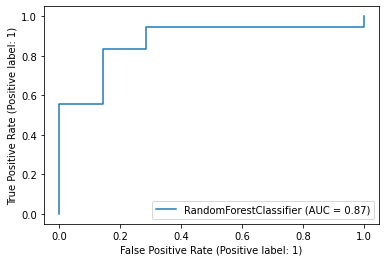

In [83]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=49)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=23)
df = RandomForestClassifier(random_state=23)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

### Saving the model

In [84]:
joblib.dump(Region,'Avacado-Classification.pkl')

['Avacado-Classification.pkl']